# Exploratory Data Analysis<a id='Exploratory_Data_Analysis'></a>

# 1.1 Contents<a id='1.1_Contents'></a>
* [1 Exploratory Data Analysis](#1_Exploratory_Data_Analysis)
  * [1.1 Problem Statement](#1.1_Problem_Statement)
  * [1.2 Imports](#1.2_Imports)
  * [1.3 Load The Data](#1.3_Load_The_Data)
  * [1.4 Explore The Data](#1.4_Explore_The_Data)
    * [1.4.1 Visualizing High Dimensional Data](#1.4.1_Visualizing_High_Dimensional_Data)
      * [1.4.1.1 Average Door Swings Per State](#1.4.1.1_Average_Door_Swings_Per_State)
      * [1.4.1.2 Distribution of Door Swings By State](#1.4.1.1_Distribution_of_Door_Swings_By_State)
    * [1.4.2 Numeric Features](#1.4.1_Numeric_Features)
      * [1.4.2.1 Numeric Data Summary](#1.4.2.1_Numeric_Data_Summary)
  * [1.5 Summary](#1.5_Summary)  

## 1.1 Problem Statement

The problem I am trying to solve is how we can find a model that can accurately forecast how many door swings (customer count) our retail locations (Xfinity stores) will see in a given month. In this notebook, I will look at the different attributes of door swings and features, including the average number of door swings per store, the average number of door swings per state, etc.

## 1.2 Imports

## 1.3 Load The Data

In [190]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from thefuzz import StringMatcher, fuzz, process, string_processing, utils
import thefuzz
from Username_PW import *

In [4]:
df = pd.read_excel(r'/Users/Alan/Library/CloudStorage/OneDrive-Comcast/Python/Springboard/Data Wrangling.xlsx')

In [5]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

In [6]:
df.head()

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369


## 1.4 Explore The Data

Where does the data set start?

In [138]:
print(df.date.min())

2014-12-22 00:00:00


The data set starts on December 12, 2014.

Where does the data set end?

In [142]:
print(df.date.max())

2022-11-20 00:00:00


The data set end on November 20, 2022.

How are the dates broken down? Is it by month, date, year, or date, month, year, etc.?

In [200]:
print(df.date)

0       2014-12-22
1       2014-12-22
2       2014-12-22
3       2014-12-22
4       2014-12-22
           ...    
74784   2022-11-20
74785   2022-11-20
74786   2022-11-20
74787   2022-11-20
74788   2022-11-20
Name: date, Length: 74789, dtype: datetime64[ns]


The date is broken down by year, month and then day.

Do we have any missing days?

In [180]:
dataFrame = pd.DataFrame(df)
dataFrame = dataFrame.set_index('date')
dataFrame.index = pd.to_datetime(dataFrame.index)
k = pd.date_range(start="2014-12-21", end="2022-11-21").difference(dataFrame.index)

As a test, I wanted to put the start date one day before our data set started and ended, which was 12/22/2022 and 11/21/2022, respectively.

In [181]:
print(k)

DatetimeIndex(['2014-12-21', '2022-11-21'], dtype='datetime64[ns]', freq=None)


In [ ]:
df.date

Based on the results above, we are missing data on 12/21/2014 and 11/21/2014. However, these dates are outside the dates of our data. We have no days missing in our data frame. 

Are there any mispellings in the cities?

In [23]:
sorted_city_names = sorted(df.city.unique())

In [24]:
len(sorted_city_names)

40

We have 40 unique city names, which could mean we have some stores in the same city as another.

In [28]:
print(*sorted_city_names, sep = "\n")

Albuquerque
American Fork
Arvada
Aurora
Boulder
Brighton
Castle Rock
Centennial
Colorado Springs
Denver
Draper
Farmington
Fort Collins
Glenwood Springs
Greeley
Greenwood Village
Lakewood
Las Cruces
Layton
Littleton
Logan
Longmont
Loveland
Murray
Ogden
Orem
Park City
Parker
Pueblo
Riverton
Salt Lake City
Santa Fe
Sheridan
Silverthorne
Thornton
Tucson
West Jordan
West Valley City
Westminster
Wheat Ridge


No cities are duplicated and/or mispelled

How many unique store names are there? Are there any duplicates and spelling errors?

In [10]:
sorted_store_names = sorted(df.store_name.unique())

In [17]:
len(sorted_store_names)

50

We have 50 unique store names. Now let us see if there are any misspellings.

In [26]:
print(*sorted_store_names, sep = "\n")

3351 - Albuquerque, NM (XF)
3352 - Lakewood, CO (XF)
3353 - Colorado Springs, CO (XF)
3354 - Thornton, CO (XF)
3355 - Las Cruces, NM (XF)
3356 - Boulder, CO (XF)
3357 - Centennial, CO (XF)
3358 - Denver, CO (XF)
3359 - Loveland, CO (XF)
3360 - Arvada, CO (XF)
3361 - Longmont, CO (XF)
3362 - Pueblo, CO (XF)
3363 - Fort Collins, CO (XF)
3364 - Barnes Marketplace - Colorado Springs, CO (XF)
3365 - Gardens on Havana - Aurora, CO (XF)
3367 - Animas Valley Mall - Farmington, NM (XF)
3368 - Prairie Center - Brighton, CO (XF)
3369 - Plaza Santa Fe - Santa Fe, NM (XF)
3370 - Promenade at Castle Rock - Castle Rock, CO (XF)
3371 - Crown Point - Parker, CO (XF)
3372 - The Shops at NorthCreek - Denver, CO (XF)
3373 - Orchard Town Center - Westminster, CO (XF)
3374 -Shops at Walnut Creek -Westminster, CO (XF)
3403 - Park City, UT
3453 - Orem, UT (XF)
3454 - Tucson - River, AZ (XF)
3455 - Draper, UT (XF)
3456 - Layton2, UT (XF)
3457 - Salt Lake City, UT (XF)
3458 - Academy Square - Logan, UT (XF)
345

Each store name has a specific store number at the beginning to differentiate them from each other because we can have some stores in the same cities.

There are no duplicates or misspellings in the names. Each store has its unique store number, and none overlap.

Let us look at how many value counts each store has. I am interested to see if some stores have more records than others.

In [44]:
unique_store_records = df.date.groupby([df.store_name.str.strip("'")]).nunique()

In [45]:
print(unique_store_records)

store_name
3351 - Albuquerque, NM (XF)                                     2841
3352 - Lakewood, CO (XF)                                        2891
3353 - Colorado Springs, CO (XF)                                2891
3354 - Thornton, CO (XF)                                        2891
3355 - Las Cruces, NM (XF)                                      1463
3356 - Boulder, CO (XF)                                         2822
3357 - Centennial, CO (XF)                                      2879
3358 - Denver, CO (XF)                                          1829
3359 - Loveland, CO (XF)                                        2489
3360 - Arvada, CO (XF)                                          2134
3361 - Longmont, CO (XF)                                        1904
3362 - Pueblo, CO (XF)                                          1750
3363 - Fort Collins, CO (XF)                                    1748
3364 - Barnes Marketplace - Colorado Springs, CO (XF)           1107
3365 - Gardens on Havan

There are stores that have higher amounts of data points because either they opened after 01-01-2019 or the stores have closed down and are no longer open.

Let us ensure that the state abbreviations are not duplicated or misspelled.

In [35]:
print(df.state.unique())

['NM' 'CO' 'UT' 'AZ']


All state abbreviatons are spelled correctly and not duplicated.

How many stores are there per state?

In [10]:
print(df.groupby('state')['store_name'].nunique())

state
AZ     2
CO    29
NM     6
UT    13
Name: store_name, dtype: int64


We have a total of 50 stores with the most in Colorado and the least amount in Arizona.

### 1.4.1 Visualizing High Dimensional Data

#### 1.4.1.1 Average Door Swings Per State

Now that we have explored the data, I am interested in a couple of questions about the data set. The first question is, what is the average amount of door swings per state?

In [23]:
state_avg_ds = df.groupby('state')['door_swings'].mean()
state_avg_ds.head()

state
AZ    190.512353
CO    260.751677
NM    377.025080
UT    202.568478
Name: door_swings, dtype: float64

In [24]:
df.sort_values(['door_swings'],ascending=False).head(20)

,date,store_name,city,state,door_swings
9577,2017-08-11,"3360 - Arvada, CO (XF)",Arvada,CO,1683
9238,2017-07-16,"3354 - Thornton, CO (XF)",Thornton,CO,1582
83,2014-12-31,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,1509
38246,2020-09-03,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1291
16860,2018-10-27,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,1274
9842,2017-09-01,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1272
18287,2018-12-29,"3360 - Arvada, CO (XF)",Arvada,CO,1249
39374,2020-10-01,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1234
22417,2019-06-03,"3365 - Gardens on Havana - Aurora, CO (XF)",Aurora,CO,1224
38207,2020-09-02,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,1218


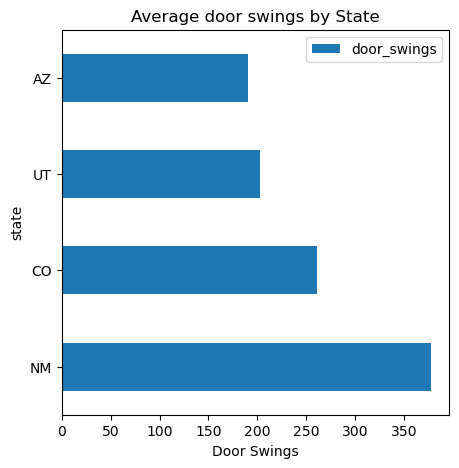

In [18]:
(state_mean_doorswings.reindex(index=state_mean_doorswings.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(5, 5), title='Average door swings by State'))
plt.xlabel('Door Swings');

It is interesting to note that NM has the highest average door swings per state, and the Albuquerque store in NM has 10 out of the 20 highest door swings in the past eight years. Keep in mind that NM is the second lowest state regarding the total number of stores per state.

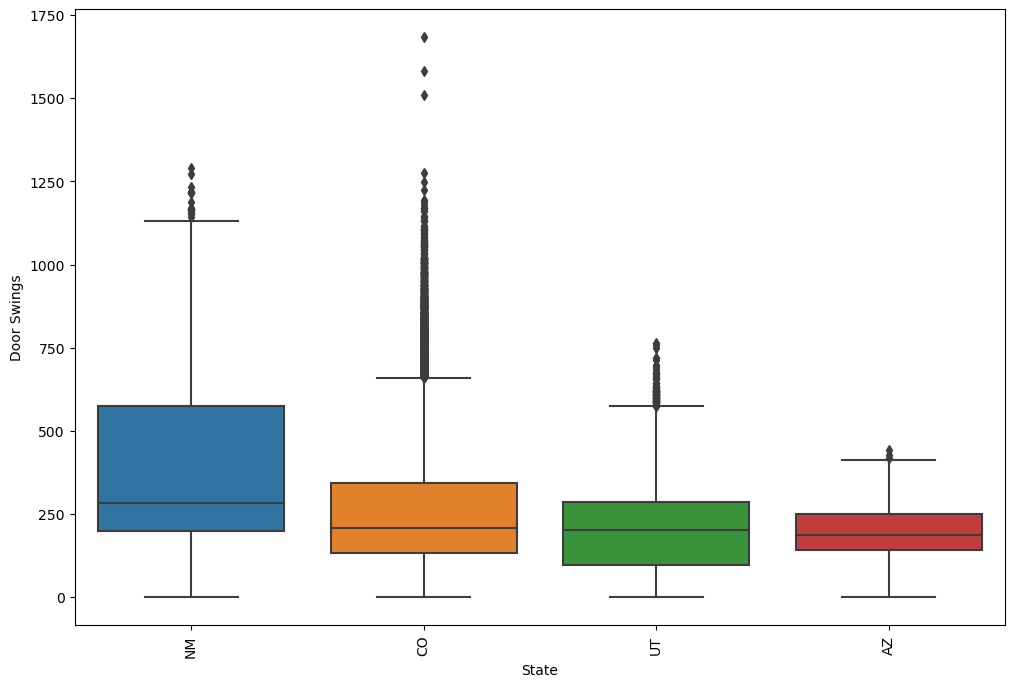

In [19]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='door_swings', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Door Swings')
plt.xlabel('State');

#### 1.4.1.2 Count of Door Swings

I wonder if there are specific numbers that occur over this data set. Specifically, is there a number that pops up more often than others regarding door swings?


(array([8.2080e+03, 1.9344e+04, 1.7196e+04, 1.2314e+04, 6.7630e+03,
        3.8420e+03, 2.7360e+03, 1.7920e+03, 1.0800e+03, 7.2300e+02,
        4.2600e+02, 2.1000e+02, 9.2000e+01, 4.5000e+01, 1.2000e+01,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0.  ,   84.15,  168.3 ,  252.45,  336.6 ,  420.75,  504.9 ,
         589.05,  673.2 ,  757.35,  841.5 ,  925.65, 1009.8 , 1093.95,
        1178.1 , 1262.25, 1346.4 , 1430.55, 1514.7 , 1598.85, 1683.  ]),
 <BarContainer object of 20 artists>)

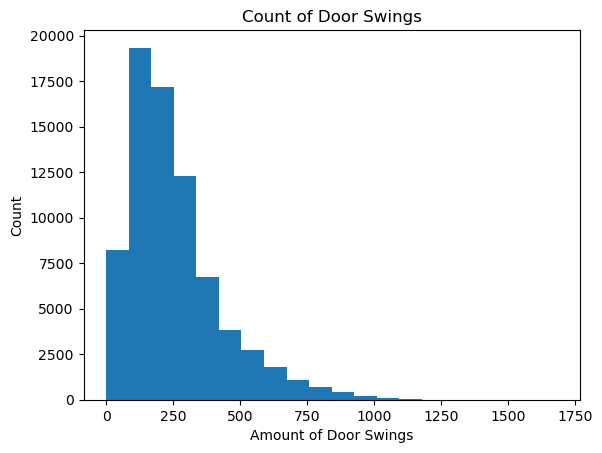

In [13]:
plt.xlabel('Amount of Door Swings')
plt.ylabel('Count')
plt.title('Count of Door Swings')
plt.hist(df['door_swings'], bins=20)

In [15]:
df['door_swings'].value_counts()

0       2286
162      265
106      265
158      263
137      261
        ... 
1003       1
1039       1
1043       1
1161       1
1012       1
Name: door_swings, Length: 1105, dtype: int64

The most recurring number of daily door swings is between 0 and 300. Most of our stores are open 10 hours a day and 7 hours on the weekend. Besides 0, the top 4 most recurring number that comes up is 162, 106, 158 and 137.

#### 1.4.3.1 Numeric Data Summary

In [20]:
df.describe()

,door_swings
count,74789.000000
mean,253.804129
std,177.083237
min,0.000000
25%,131.000000
50%,214.000000
75%,328.000000
max,1683.000000


It is interesting to see that we had a store have almost 1700 customers go into a store in one given day.

In [21]:
df.groupby(pd.Grouper(key='date', freq='1Y')).sum().head(10)

,door_swings
date,
2014-12-31,32174
2015-12-31,1275108
2016-12-31,1301189
2017-12-31,1602200
2018-12-31,2321143
2019-12-31,3203486
2020-12-31,3249148
2021-12-31,3145370
2022-12-31,2851939


Interestingly, our door swings increased from 2019 to 2020 when the pandemic was at its height.

## 1.5 Summary 

There are no missing dates, misspellings, or duplicates in store names. We have all the states, the cities and states are also spelled correctly, and we have all the state data. We found that we operate in four states and have 50 stores across the four states. NM has had the highest average door swings over the past eight years, even though they only have six stores. We will bring this data over to the pre-processing and training data.